In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Generate random linear data
x = np.linspace(0.,1.,100)

#   a   * x + b   + random noise
y = 0.1 * x + 0.5 + np.random.uniform(-.05,.05,100)

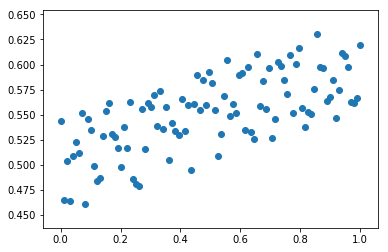

In [28]:
# Plot the random sample
plt.scatter(x,y)
plt.show()

$\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}$

$\hat{\beta} = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n} (x_{i} - \bar{x})^{2}}$

$y = \alpha + \beta x$

In [39]:
x_mean = x.mean()
y_mean = y.mean()

beta_hat = sum((x - x_mean) * (y - y_mean)) / sum((x - x_mean) ** 2)
alpha_hat = y_mean - beta_hat*x_mean

print('y = {} + {}x'.format(alpha_hat, beta_hat))

y = 0.508469710177259 + 0.08664663849225158x


In [ ]:
def f(x):
    return alpha_hat + x * beta_hat

true_y = f(x)

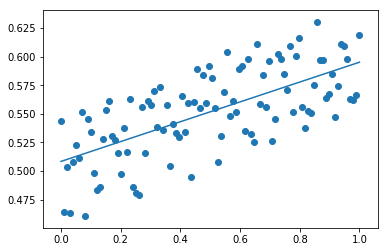

In [38]:
plt.plot(x, true_y)
plt.scatter(x,y)
plt.show()

$loss = \frac{1}{n} \sum_{n}^{i=1}(\bar{y_{i}} - y_{i})^{2}$

In [ ]:
def loss(alpha, beta):
    y_hat = alpha + x*beta
    return 1/y_hat.size * sum(y_hat - y) ** 2)
    